In [1]:
import numpy as np
import scipy as sp
import primefac as pf
import seaborn as sns
from scipy.stats import norm as normal_distribution
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#
def prime_factors_count(n):
    factors = set(pf.primefac(n))
    return len(factors)
#
N = 2**24  # factoring numbers up to N
#
prime_divisor_counts = np.array([prime_factors_count(num) for num in range(2, N + 1)])

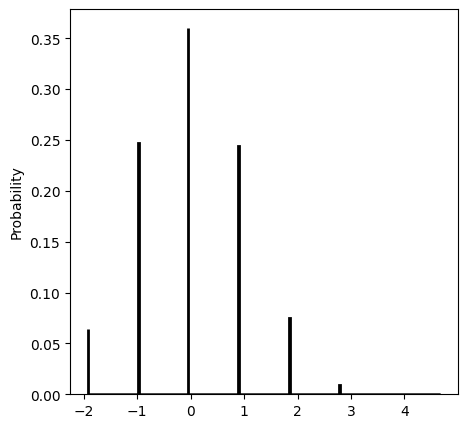

In [3]:
# demeaning and standartizing 
avg, sigma = prime_divisor_counts.mean(), prime_divisor_counts.std()
data_div = (prime_divisor_counts - avg)/sigma
# plot a histogram
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data_div, kde=False, stat='probability', cumulative=False, color='blue', \
             linewidth=2, label='Number of Prime Divisors', legend=True, ax=ax);

In [4]:
# fitting data to normal N(0,1)
loc, scale = normal_distribution.fit(data=data_div)
# data is normalized, so here we expect (0.0, 1.0) or close
print(loc, scale)
# here we compare the mean and standard deviation to the Erdos-Kac theorem parameters
print(avg, np.log(np.log(N)))
print(sigma, np.sqrt(np.log(np.log(N))))

7.625329858867191e-17 1.0000000000000004
3.0455853370180925 2.8115409097662813
1.0626501844345664 1.6767650132819092


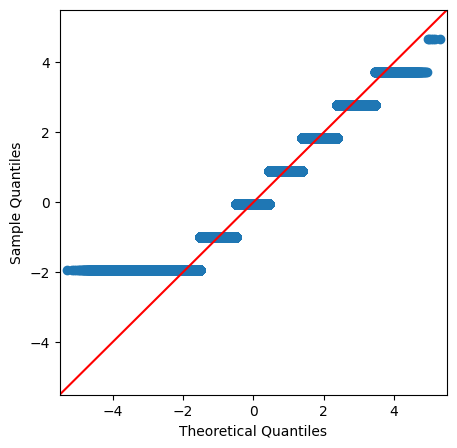

In [5]:
# QQ plot
fig, ax = plt.subplots(figsize=(5, 5))
sm.qqplot(data=data_div, dist=normal_distribution, loc=loc, scale=scale, fit=False, line='45', ax=ax);

In [6]:
#
# test normality with D’Agostino and Pearson’s test
#
res = sp.stats.normaltest(data_div)
res.pvalue

0.0

In [7]:
#
# For comparison, let us do the same for the CLT convergence of binomial to normal (fixed p, and large n)
# The rate of convergence will be much higher, and we will see it plain and simple
#

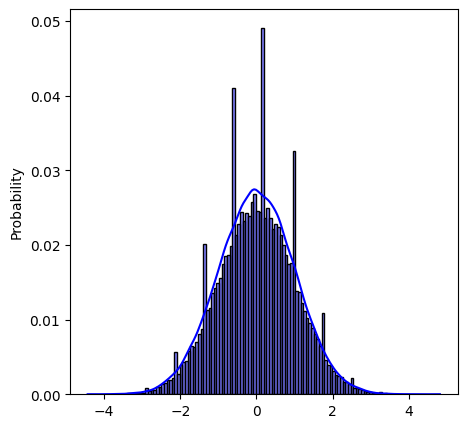

In [8]:
# Parameters for the binomial distribution
n = 1000  # Number of trials
p = 0.5  # Probability of success

N = 2**16

# length N sample from binomial distribution
binomial_samples = np.random.binomial(n, p, size=N)

avg = binomial_samples.mean()
sigma = binomial_samples.std()

data_bin = (binomial_samples - avg)/sigma

fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data_bin, kde=True, stat='probability', cumulative=False, color='blue', \
             linewidth=1, label='Binomial Sampling', legend=True, ax=ax);

In [9]:
# fitting data to normal N(0,1)
loc, scale = normal_distribution.fit(data=data_bin)
# data is normalized, so here we expect (0.0, 1.0) or close
print(loc, scale)
# here we compare the mean and standard deviation to the CLT parameters
print(avg, n*p)
print(sigma, np.sqrt(n*p*(1-p)))

-6.830473686658678e-18 0.9999999999999999
499.98191833496094 500.0
15.798080237518885 15.811388300841896


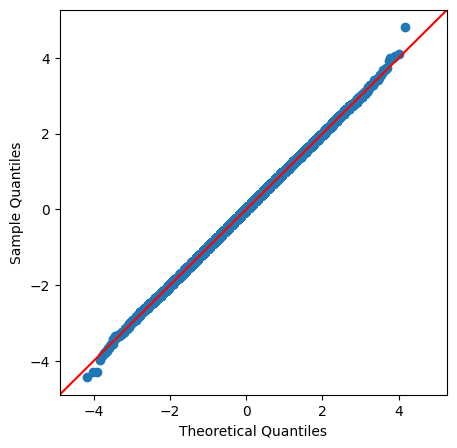

In [10]:
# QQ plot
fig, ax = plt.subplots(figsize=(5, 5))
sm.qqplot(data=data_bin, dist=normal_distribution, loc=loc, scale=scale, fit=False, line='45', ax=ax);

In [11]:
#
# test normality with D’Agostino and Pearson’s test (in this case we expect a much larger p-value)
#
res = sp.stats.normaltest(data_bin)
res.pvalue

0.46566629559570893